# Nick Tufano
# Data Science 201 - Final Project 

##**Business Understanding**

This project uses machine learning algorithms to see if it can sucessfully predict when to buy a specific stock. As and Economics Major going into finance, the success of this algorithm would be extremley valuable both in a business setting and for individuals. There are thousands of firms across the globe that pay top dollar for quants, data scienctists, and computer scientists to explore just that. 

It is important to note in the business understanding that in order for this to be deployable in an actual company it needs to not only be successful, but with a strong degree of confidence as significant sums of money will be at stake. Given the amount this and the amount of research already done on the topic, I am pessimistic of my success in this, but nonetheless will serve as a great example of machine learning in a data-science project

##**Data Understanding**

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

**Importing Data**

In [4]:
df = pd.read_csv('stockprice.csv')

**Exploring the Data**

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-12-13,29.299999,29.440001,28.219999,28.520000,19.852179,7609900
1,2002-12-16,28.549999,28.990000,28.290001,28.680000,19.963556,8149700
2,2002-12-17,28.600000,28.610001,27.570000,27.709999,19.288351,9248800
3,2002-12-18,27.690001,27.959999,27.260000,27.520000,19.156096,13631300
4,2002-12-19,27.250000,28.200001,27.200001,27.580000,19.197863,6990900


In [6]:
df.shape

(5034, 7)

In [7]:
df.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2002-12-13   29.299999   29.440001   28.219999   28.520000   19.852179   
1     2002-12-16   28.549999   28.990000   28.290001   28.680000   19.963556   
2     2002-12-17   28.600000   28.610001   27.570000   27.709999   19.288351   
3     2002-12-18   27.690001   27.959999   27.260000   27.520000   19.156096   
4     2002-12-19   27.250000   28.200001   27.200001   27.580000   19.197863   
...          ...         ...         ...         ...         ...         ...   
5029  2022-12-06  490.660004  491.470001  477.170013  481.160004  481.160004   
5030  2022-12-07  479.089996  486.540009  478.869995  481.970001  481.970001   
5031  2022-12-08  482.899994  483.329987  473.500000  481.420013  481.420013   
5032  2022-12-09  475.100006  490.089996  470.500000  483.019989  483.019989   
5033  2022-12-12  482.730011  487.820007  480.670013  487.679993  487.679993   

     

In [11]:
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2002-12-13   29.299999   29.440001   28.219999   28.520000   19.852179   
1     2002-12-16   28.549999   28.990000   28.290001   28.680000   19.963556   
2     2002-12-17   28.600000   28.610001   27.570000   27.709999   19.288351   
3     2002-12-18   27.690001   27.959999   27.260000   27.520000   19.156096   
4     2002-12-19   27.250000   28.200001   27.200001   27.580000   19.197863   
...          ...         ...         ...         ...         ...         ...   
5029  2022-12-06  490.660004  491.470001  477.170013  481.160004  481.160004   
5030  2022-12-07  479.089996  486.540009  478.869995  481.970001  481.970001   
5031  2022-12-08  482.899994  483.329987  473.500000  481.420013  481.420013   
5032  2022-12-09  475.100006  490.089996  470.500000  483.019989  483.019989   
5033  2022-12-12  482.730011  487.820007  480.670013  487.679993  487.679993   

       

**Plotting Rise of Costco Stock Price**

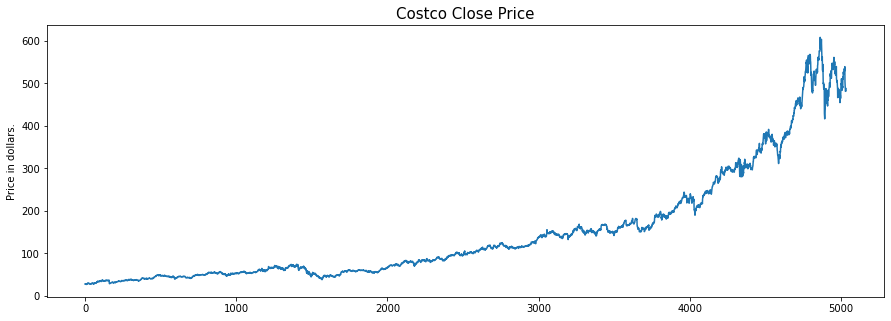

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Costco Close Price', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

**Checking Distribution of Variables**

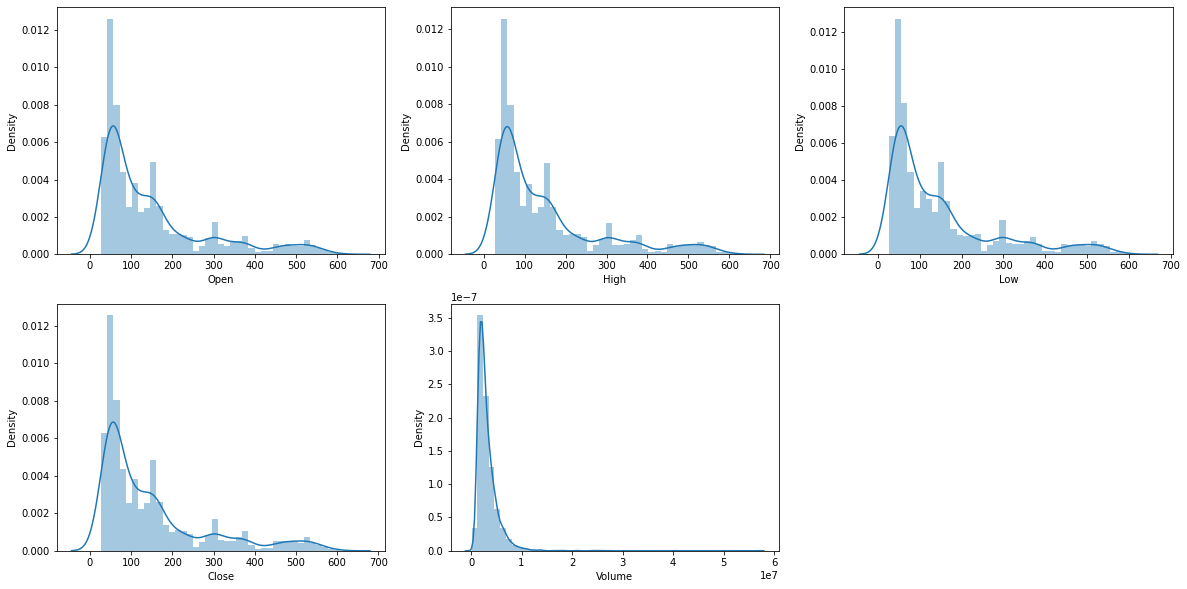

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

##**Data Preperation**

**Dropping Unused Variables**

In [22]:
df[df['Close'] == df['Adj Close']].shape

(32, 10)

In [24]:
df = df.drop(['Adj Close'], axis=1)

**Checking for Null Values in Variables**

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Checking for Outliers**

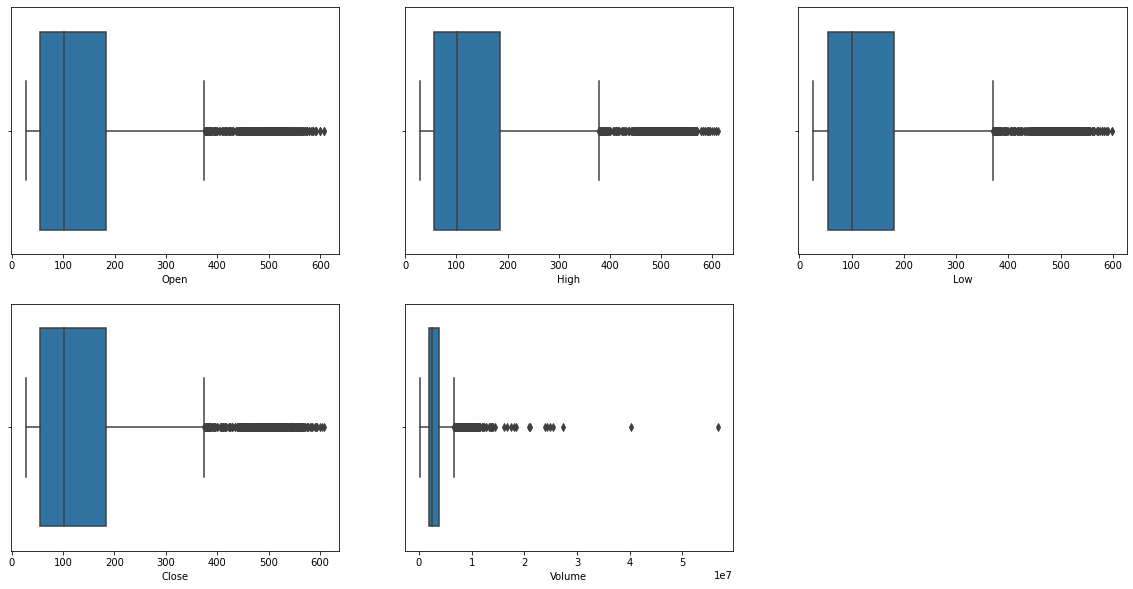

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

No outliers other than volume which is okay. Variance in share prices makes sense given the trend of the stock price in the last two years.

##**Modeling+Evaluating**



Setting target value for machine learning to strive for.

In [14]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Checking if target is balanced

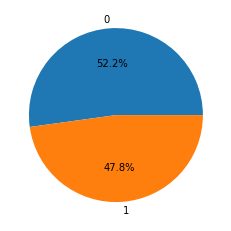

In [15]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

Using a heatmap to see if any variables are highly correlated. Setting the threshold fpr high correlation as anything over 0.9.

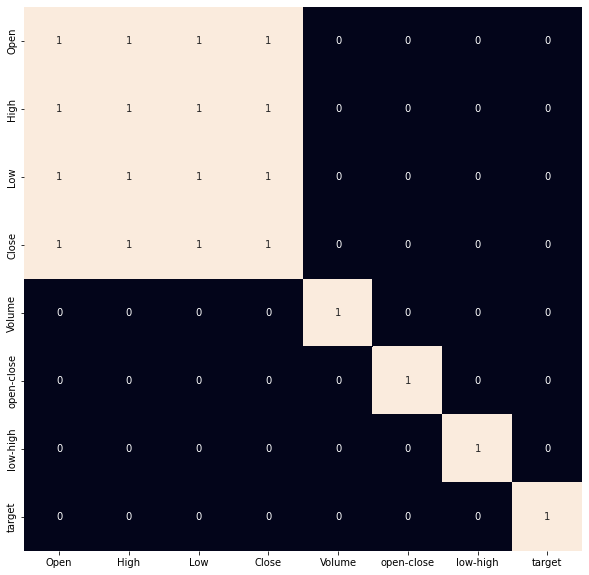

In [25]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above we can see that none of the variables are highly correlated other than Open, High, Low and Close which makes sense.

In [17]:
features = df[['open-close', 'low-high']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(4530, 2) (504, 2)


##**Deployment**

Using three types of machine learning to see which is able to best predict whether or not to buy Costco stock. The code below is for a logistic regression, a support vector classifier and a XGBClassifier.

In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.4939901820501849
Validation Accuracy :  0.5124842171717171

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5183777514485061
Validation Accuracy :  0.5229640151515152

XGBClassifier() : 
Training Accuracy :  0.6608878102870727
Validation Accuracy :  0.49806660353535354



From the above results we see that the logistic regression performed the worse. The best on the training set was the XGB Classifier, but lookingat how it performed in validation shows that the model is likely overfitting. SVC preformed moderatley well.

Visually plotting our results to better interpret them.

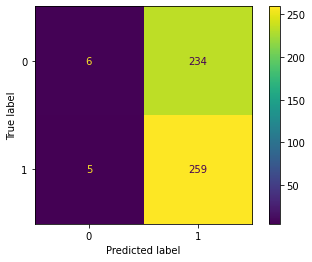

In [ ]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

The above graph shows that the models did not perform much better than flipping a coin.


This result is what was expected. We were aware of the small liklihood of being able to sucessfully predict whether or not to buy a stock from the start. While the machine learning was unsucessful in this pursuit, we did successfully have the machine learning categorize the data. Having an unsuccessful model IS OKAY IN DATA SCIENCE. The import thing is that we take the time to understand why it fails and and are clear and transparent about those failures.

##**Sources**

https://www.geeksforgeeks.org/stock-price-prediction-using-machine-learning-in-python/

https://neptune.ai/blog/predicting-stock-prices-using-machine-learning

https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning

https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/